# Content and Objective

+ Show that systems with poles outside the unit circle can be stable
+ Example showing that by windowing and "causal-izing" only negligible loss is observed

# Importing and Plotting Options

In [1]:
import numpy as np

from scipy import signal

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Define and Analyze Anticausal System

In [3]:
# define length of impulse response and anticausal times
N = 5 
n = np.arange( -N, 1, 1)

# define impulse response for negative time indices and apply zero padding to h 
a = 2.
h = a**n
h = np.append( h, np.zeros( 3 * len(h) ) )

In [4]:
# get parameters in frequency regime out of FFT identities
delta_Omega = 2 * np.pi / len(h)
Omega = np.arange( 0, 2 * np.pi, delta_Omega )

# get frequency response by FFT
H = np.fft.fft( h ) 

# ideal frequency response for the impulse response
H_ideal = - a / ( np.exp( 1j * Omega ) - a )

**Remarks:** 

+ Note that frequency range is not symmetric to zero frequency, but is deliberately defined as being $[0, 2\Omega)$. So, please get used to different representations and definitions.

# Plotting

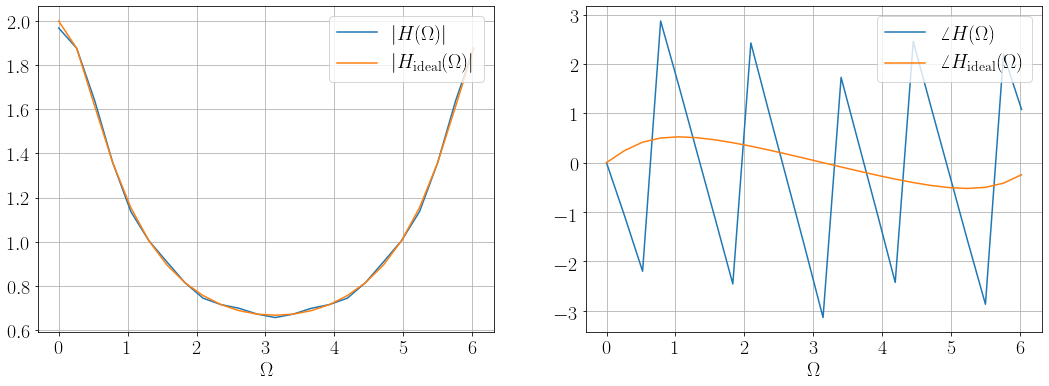

In [5]:
plt.subplot(121)
plt.plot( Omega, np.abs( H ), label='$|H(\\Omega)|$')
plt.plot( Omega, np.abs( H_ideal ), label='$|H_\\mathrm{ideal}(\\Omega)|$')
plt.grid( True ) 
plt.xlabel('$\\Omega$')
plt.legend(loc='upper right')

plt.subplot(122)
plt.plot( Omega, np.angle( H ), label='$\\angle H(\\Omega)$' )
plt.plot( Omega, np.angle( H_ideal ), label='$\\angle H_\\mathrm{ideal}(\\Omega)$' )
plt.grid( True ) 
plt.xlabel('$\\Omega$')
plt.legend(loc='upper right')

**Question:** Obviously, magnitudes correspond quite well. Explain the (significantly) different phases.